<a href="https://colab.research.google.com/github/karen-wang/colab-yearly-expenses/blob/main/How_to_Create_a_Snapshot_of_Your_Yearly_Expenses_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Karen Y. Wang**

As a personal finance nut, I’ve made it a habit to analyze my expenses at the end of every year. At first, I started doing this because I wanted to identify areas where I could cut down on my spending. But, this exercise also helped me see areas where I *enjoyed* spending money—things like gifts, vacations, and nice meals with family and friends. This tutorial will show you how to use Colab to create a snapshot of your yearly expenses. Hopefully, it will also help you gain a better understanding of your relationship to your spending habits.

## About Colab
Google Colaboratory, or Colab for short, is a free service that allows you to write and execute Python code in the browser. Code snippets and text elements are organized into Colab notebooks, which can be read as documents and shared with others.

# Before you begin
First, you will need to login to your online bank account and download your yearly transactions in CSV format. Next, you’ll want to upload the CSV file into Google Drive. For this tutorial we will be using my spending data from 2019.



# Setup

First, let's read the data from the CSV file. To do this we will be using `pandas`, a Python library used for doing data analysis. Let's import the library and name it `pd` for short. 

In [3]:
import pandas as pd

Next, let's load the CSV file from Drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now let's read the CSV file contents into a `pandas` table called `transactions`.

In [23]:
transactions = pd.read_csv('/content/drive/My Drive/finance/2020-06-13_transaction_download.csv')

Now let's inspect the table contents. This can be done by calling `transactions.head()`, which lists the first few rows.

In [25]:
transactions.head()

,Transaction Date,Posted Date,Card No.,Description,Category,Debit,Credit
0,2019-12-28,2019-12-30,4704,UINPIBOTSUKUSU,Other Services,94.62,NaN
1,2019-12-26,2019-12-28,4704,CHEESE,Merchandise,13.71,NaN
2,2019-12-27,2019-12-28,4704,SQ*BASEHAKUBA,Dining,8.23,NaN
3,2019-12-25,2019-12-27,4704,RAKUTENPAY EMBLEMHOSTELNI,Lodging,106.29,NaN
4,2019-12-26,2019-12-27,4704,Zappos.com,Merchandise,NaN,119.03


Each row lists the details about a transaction. In particular, notice how the `Description` column contains the merchant name, and the `Category` column contains one of a fixed set of category values. Each row also has a value in either the `Debit` or `Credit` column, which indicates whether that transaction was an expense or a refund. For example, on December 26th, I spent \$13.71 on cheese and got a refund of \$119.03 from Zappos.

You might be wondering what the `NaN` values refer to. `NaN` stands for "Not a Number," and appears in the place of an undefined numeric value. However, for our purposes you can just ignore them.

# Breakdown by category

Now, I would like to know where I spent the most money. To accomplish this, we can group our transactions by category. But first, let's get an idea of which categories exist. To do so, we can list the unique values for the `Category` column.

In [26]:
transactions.Category.unique()

array(['Other Services', 'Merchandise', 'Dining', 'Lodging',
       'Other Travel', 'Phone/Cable', 'Gas/Automotive', 'Other',
       'Airfare', 'Payment/Credit', 'Health Care', 'Entertainment',
       'Professional Services', 'Insurance', 'Internet'], dtype=object)

Overall, the categories seem to make sense. Notice however that there is a mysterious category called `Payment/Credit`. It turns out this isn't actually a spending category, and is used to label credit card payments. We don't need this information, so let's remove all rows categorized as `Payment/Credit`.

In [29]:
transactions = transactions[transactions.Category != 'Payment/Credit']

Now let's determine the total amount spent for each category. Let’s compute a new table, called `sum`, which will represent the sums of all transactions per category.



In [30]:
sum = transactions.groupby(['Category']).sum()

Let’s examine the `sum` table.

In [31]:
sum.head()

,Card No.,Debit,Credit
Category,,,
Airfare,51744,3571.36,257.38
Dining,1735776,6586.22,0.00
Entertainment,174048,1641.27,0.00
Gas/Automotive,28224,346.06,0.00
Health Care,211680,2878.26,75.88


Recall that a transaction labeled `Debit` meant it was an expense, and `Credit` meant it was a refund. In the `sum` table above, a category's `Debit` column contains the total amount spent in that category, and `Credit` contains the total amount refunded to that category.

To determine the final amount, we need to subtract debits from credits.

Let’s do some calculations! We’ll add a new column to our table named `Total`, and store the calculation result there.

In [32]:
sum["Total"] = sum["Debit"] - sum["Credit"]

Now let's store our total spending for each category in a new table called `totals`, and take a look.



In [37]:
totals = sum[["Total"]]
totals

,Total
Category,
Airfare,3313.98
Dining,6586.22
Entertainment,1641.27
Gas/Automotive,346.06
Health Care,2802.38
Insurance,23.21
Internet,31.14
Lodging,2960.50
Merchandise,7693.58


In order to easily see where I spent the most money, let’s sort our table in descending order and plot it.

`totals.plot.bar` creates a bar plot from the `totals` table. The `rot` field specifies the angle at which to display the x-axis labels. `figsize` specifies the figure size.

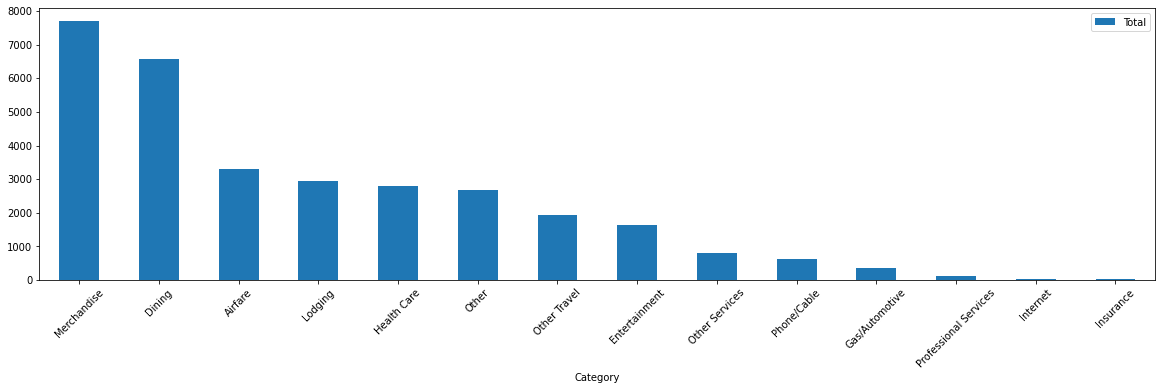

In [54]:
totals = totals.sort_values(by=["Total"], ascending=False)
ax = totals.plot.bar(rot=45, figsize=(20,5))

It looks like one of the categories I spent the most money in was dining. This makes sense. In 2019, I lived in New York City and rarely cooked at home. As a result, I splurged a *lot* on dining out.

Let's take a deeper look at the `Dining` category, shall we?

# Breakdown of Dining

First, let's go back to our original `transactions` table. We only care about transactions in the `Dining` category, so let's store these in a separate table.

In [60]:
dining = transactions.loc[transactions['Category'] == 'Dining']

Next, let's group transactions by `Description` column. Recall that this column contains the merchant name, so we are basically grouping all transactions by restaurant.

We'll store the results in a new table called `dining_sum`.

In [61]:
dining_sum = dining.groupby(['Description']).sum()

Now we'll use the same logic as above to calculate the total spent at each restaurant.

In [62]:
dining_sum["Total"] = dining_sum["Debit"] - dining_sum["Credit"]
dining_totals = dining_sum[["Total"]]

Finally we'll sort our table in descending order and plot the top five restaurants where I spent the most money. We can do so using the `nlargest` command.

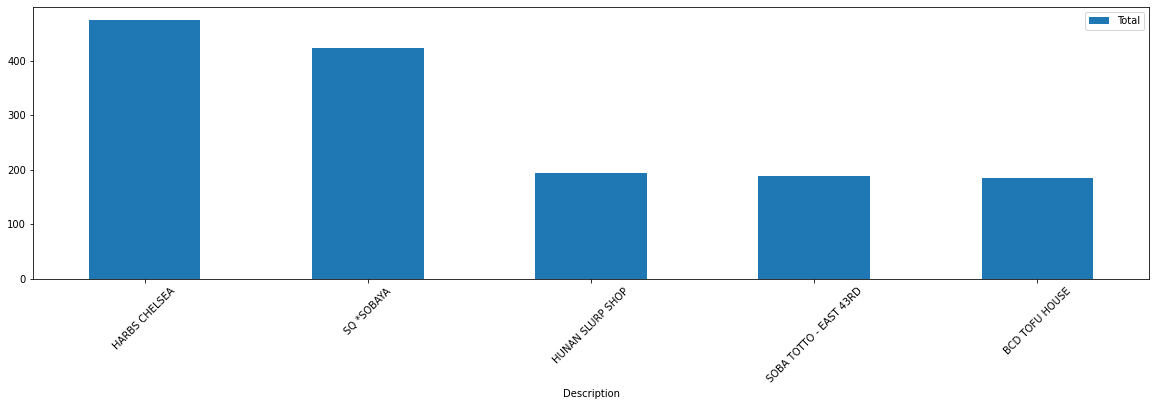

In [64]:
dining_totals = dining_totals.sort_values(by=["Total"], ascending=False)
ax = dining_totals.nlargest(5, "Total").plot.bar(rot=45, figsize=(20,5))

It looks like the restaurant where I spent the most money was [HARBS Chelsea](https://goo.gl/maps/WPYSRpfUoRjhDXyp8). I discovered this Japanese cafe near my office one day and it quickly became one of my go-to places. I spent many enjoyable afternoons there drinking tea, eating cake, and catching up with friends.

The other restaurants in the list also bring up many fond memories for me. I highly recommend them to anyone visiting New York City:

2. [Sobaya](https://goo.gl/maps/jWSrS8mYSesGTGT2A): An East-Village restaurant specializing in homemade soba noodles and authentic Japanese dishes.
3. [Hunan Slurp](https://goo.gl/maps/wnxe8uYSHYjfAnxn7): A Chinese restaurant with good ambience and lots of delicious spicy dishes. Also located in East Village.
4. [Soba Totto](https://goo.gl/maps/cZpaNf7VM9aZzs5M8): Another soba restaurant located in Midtown.
5. [BCD Tofu House](https://goo.gl/maps/VibDhrNXM1PMSXBE6): My favorite spot for late-night tofu soup and barley tea. Located in Koreatown.